# Decision Tree Assignment

## Importing Libraries

In [48]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Importing dataset

In [49]:
Fraud_check = pd.read_csv("Fraud_check.csv")

## Data Understanding

In [50]:
Fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [51]:
Fraud_check.shape 

(600, 6)

In [52]:
Fraud_check.isna().sum() 

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

## Converting Categorical data into numerical using Label Encoding

In [53]:
LabelEncoder = preprocessing.LabelEncoder()
Fraud_check['Undergrad'] = LabelEncoder.fit_transform(Fraud_check['Undergrad'])
Fraud_check['Marital.Status'] = LabelEncoder.fit_transform(Fraud_check['Marital.Status'])
Fraud_check['Urban'] = LabelEncoder.fit_transform(Fraud_check['Urban'])

In [54]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [55]:
Fraud_check.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

## Separate input and output

In [56]:
x = Fraud_check.drop(labels='Taxable.Income',axis=1)
y = Fraud_check['Taxable.Income']

In [57]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [58]:
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

## Splitting dataset into training and testing data

In [12]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [13]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
332,1,0,84132,1,0
13,0,1,86649,16,1
274,1,1,112584,25,0
257,1,1,31611,17,1
112,1,2,193038,26,1
...,...,...,...,...,...
440,0,2,170407,13,1
165,1,1,38463,23,1
7,1,2,131253,3,1
219,1,0,26814,9,0


In [14]:
y_train

332    98240
13     61830
274    58451
257    54747
112    96355
       ...  
440    77312
165    91304
7      62774
219    20604
326    27698
Name: Taxable.Income, Length: 480, dtype: int64

In [15]:
x_train.shape,y_train.shape

((480, 5), (480,))

In [16]:
x_test.shape,y_test.shape

((120, 5), (120,))

## Building Decision Tree Classifier using Entropy Criteria

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [61]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

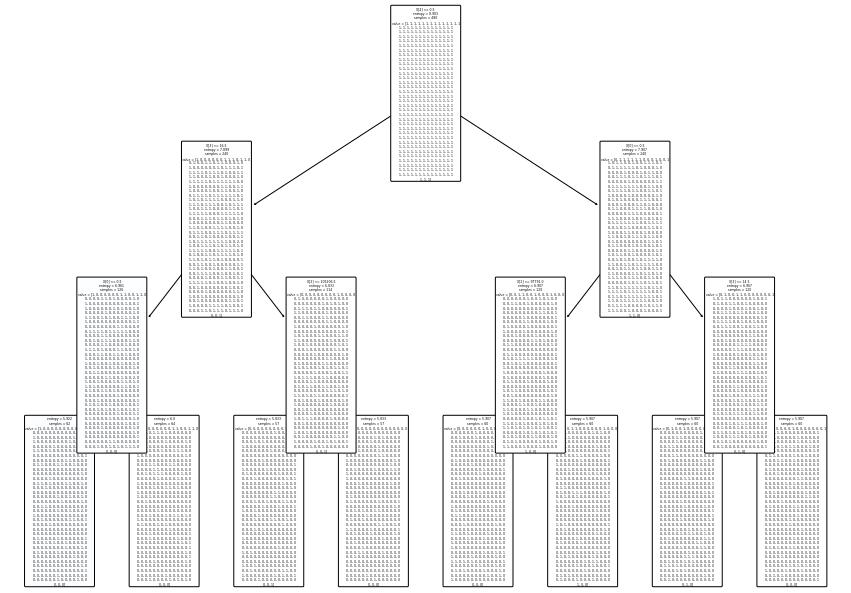

In [64]:
plt.figure(figsize=(15,10))
plot_tree(model,rounded=True,filled=True)
plt.show()

In [66]:
# For training data
y_train_pred= model.predict(x_train)

In [67]:
# For testing data
y_test_pred= model.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

## For training data

In [70]:
accuracy_score(y_train,y_train_pred)

0.01875

In [71]:
print(confusion_matrix(y_train,y_train_pred))

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [72]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

       10150       0.00      0.00      0.00         1
       10163       0.02      1.00      0.03         1
       10329       0.02      1.00      0.03         1
       10348       0.00      0.00      0.00         1
       10379       0.00      0.00      0.00         1
       10455       0.02      1.00      0.03         1
       10735       0.02      1.00      0.03         1
       10870       0.02      1.00      0.03         1
       10900       0.00      0.00      0.00         1
       10933       0.02      1.00      0.03         1
       10987       0.00      0.00      0.00         1
       11784       0.00      0.00      0.00         1
       11865       0.00      0.00      0.00         1
       12011       0.00      0.00      0.00         1
       12072       0.00      0.00      0.00         1
       12083       0.02      1.00      0.03         1
       12453       0.00      0.00      0.00         1
       12470       0.00    

## For testing data

In [73]:
accuracy_score(y_test,y_test_pred)

0.0

In [75]:
print(confusion_matrix(y_test,y_test_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [74]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       10003       0.00      0.00      0.00       1.0
       10163       0.00      0.00      0.00       0.0
       10329       0.00      0.00      0.00       0.0
       10455       0.00      0.00      0.00       0.0
       10735       0.00      0.00      0.00       0.0
       10870       0.00      0.00      0.00       0.0
       10933       0.00      0.00      0.00       0.0
       11794       0.00      0.00      0.00       1.0
       11804       0.00      0.00      0.00       1.0
       12083       0.00      0.00      0.00       0.0
       12514       0.00      0.00      0.00       1.0
       12682       0.00      0.00      0.00       1.0
       15296       0.00      0.00      0.00       1.0
       15532       0.00      0.00      0.00       1.0
       16264       0.00      0.00      0.00       1.0
       17957       0.00      0.00      0.00       1.0
       18032       0.00      0.00      0.00       1.0
       18572       0.00    

## Building Decision Tree Classifier (CART) using Gini Criteria

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [25]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

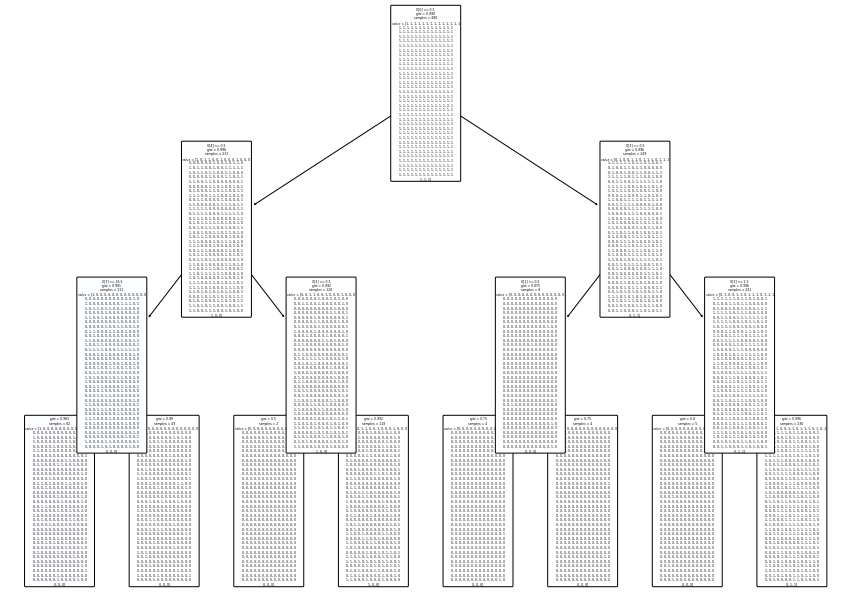

In [76]:
plt.figure(figsize=(15,10))
plot_tree(model_gini,rounded=True,filled=True)
plt.show()

In [77]:
# For training data
y_train_pred = model_gini.predict(x_train)

In [78]:
# For testing data
y_test_pred = model_gini.predict(x_test)

## For Train data

In [79]:
accuracy_score(y_train,y_train_pred)

0.01875

In [80]:
print(confusion_matrix(y_train,y_train_pred))

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [81]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

       10150       0.00      0.00      0.00         1
       10163       0.00      1.00      0.01         1
       10329       0.01      1.00      0.02         1
       10348       0.00      0.00      0.00         1
       10379       0.00      0.00      0.00         1
       10455       0.00      0.00      0.00         1
       10735       0.00      0.00      0.00         1
       10870       0.00      0.00      0.00         1
       10900       0.00      0.00      0.00         1
       10933       0.00      0.00      0.00         1
       10987       0.00      0.00      0.00         1
       11784       0.00      0.00      0.00         1
       11865       0.20      1.00      0.33         1
       12011       0.00      0.00      0.00         1
       12072       0.00      0.00      0.00         1
       12083       0.00      0.00      0.00         1
       12453       0.00      0.00      0.00         1
       12470       0.00    

## For Test data

In [82]:
accuracy_score(y_test,y_test_pred)

0.0

In [83]:
print(confusion_matrix(y_test,y_test_pred))

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [84]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       10003       0.00      0.00      0.00       1.0
       10163       0.00      0.00      0.00       0.0
       10329       0.00      0.00      0.00       0.0
       11794       0.00      0.00      0.00       1.0
       11804       0.00      0.00      0.00       1.0
       11865       0.00      0.00      0.00       0.0
       12514       0.00      0.00      0.00       1.0
       12682       0.00      0.00      0.00       1.0
       15296       0.00      0.00      0.00       1.0
       15532       0.00      0.00      0.00       1.0
       16082       0.00      0.00      0.00       0.0
       16264       0.00      0.00      0.00       1.0
       16690       0.00      0.00      0.00       0.0
       17957       0.00      0.00      0.00       1.0
       18032       0.00      0.00      0.00       1.0
       18572       0.00      0.00      0.00       1.0
       19169       0.00      0.00      0.00       1.0
       21337       0.00    